# Notebook 2: Random Variables and Distributions

## 1. Understanding Random Variables

### What is a Random Variable?

A random variable is a variable whose value is determined by the outcome of a random process. Think of it as a function that assigns a numerical value to each outcome in our sample space.

For example:
- X = number of heads in 10 coin flips
- Y = sum of two dice
- Z = height of a randomly selected person

Random variables help us move from qualitative descriptions ("it rained," "the coin came up heads") to quantitative measurements that we can analyze mathematically.

### Types of Random Variables

Random variables come in two main types:

1. **Discrete Random Variables**:
   - Take on a countable number of distinct values
   - Examples: number of heads in coin flips, count of customers in a store
   - Often involves counting or whole numbers

2. **Continuous Random Variables**:
   - Can take any value within a range (Takes measurable values over an interval)
   - Examples: height, weight, time, temperature
   - Involves measurement on a continuous scale

Let's see examples of both types:

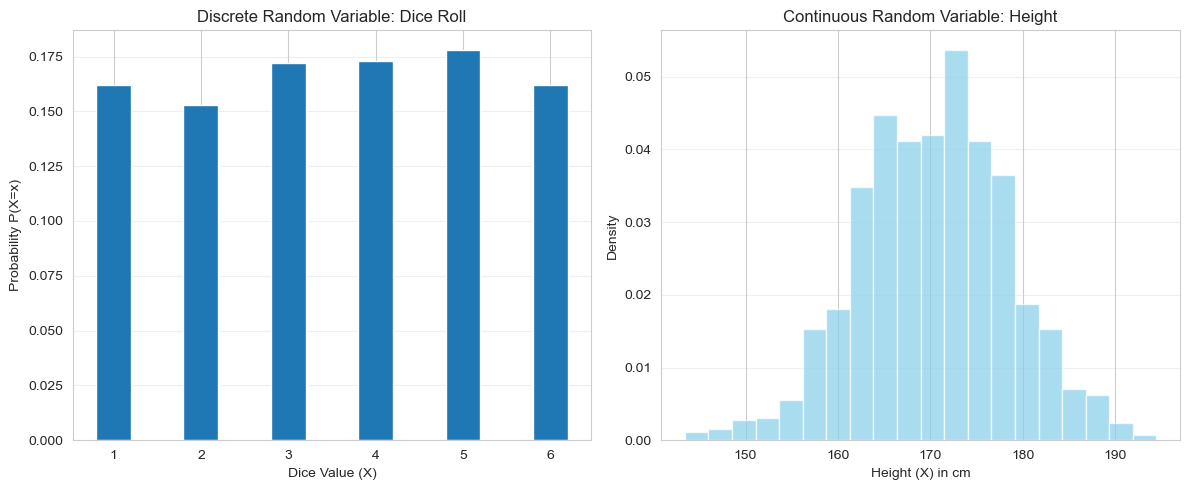

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set plot style
sns.set_style('whitegrid')

# Example 1: Discrete Random Variable - Dice Roll
plt.figure(figsize=(12, 5))

# Simulate 1000 rolls of a fair die
dice_rolls = np.random.randint(1, 7, size=1000)

# Count occurrences and calculate probabilities
unique_values, counts = np.unique(dice_rolls, return_counts=True)
probabilities = counts / len(dice_rolls)

# Plot as a bar chart (Probability Mass Function)
plt.subplot(1, 2, 1)
plt.bar(unique_values, probabilities, width=0.4)
plt.xticks(unique_values)
plt.xlabel('Dice Value (X)')
plt.ylabel('Probability P(X=x)')
plt.title('Discrete Random Variable: Dice Roll')
plt.grid(axis='y', alpha=0.3)

# Example 2: Continuous Random Variable - Height
# Simulate 1000 height measurements (in cm) using a normal distribution
# Generate 1000 random numbers that follow a Normal Distribution (Bell Curve), 
## where: The average (mean) is 170
## The spread (standard deviation) is 8"
heights = np.random.normal(170, 8, size=1000)

# Plot as a histogram (approximation of Probability Density Function)
plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, density=True, alpha=0.7, color='skyblue')
plt.xlabel('Height (X) in cm')
plt.ylabel('Density')
plt.title('Continuous Random Variable: Height')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

> 🔍 **Notice the Difference**: For discrete variables like dice rolls, we can assign a probability to each specific value. For continuous variables like height, we need to consider ranges of values instead.

170.36210445492108

### Expected Value and Variance

Two important characteristics of any random variable are its **expected value** and **variance**:

1. **Expected Value (Mean)**: is the average (or long-run mean) outcome we expect if we repeat a random process many times. It is often denoted as `E[X]` or `μ`.
   - Think of it as the "center of mass" of the distribution (It helps us summarize a Random Variable with a single number — its `'center of gravity'`)
   - Expected Value tells us what outcome balances the random variable in the long run
   - For dice: The expected value is (1+2+3+4+5+6)/6 = 3.5


2. **Variance**: Variance measures how spread out the values of a Random Variable are from the Expected Value. It is denoted as `Var(X)` or `σ²`
   - A higher variance means values are more dispersed
   - Variance tells us not just what is typical — but how surprising or uncertain outcomes can be
   - Low variance = Consistency; High variance = Risky
   - Standard deviation (σ) is the square root of variance

Let's calculate these for our examples:

In [ ]:
dice_rolls

In [13]:
# For the dice roll example
dice_mean = np.mean(dice_rolls)
dice_variance = np.var(dice_rolls)
dice_std = np.std(dice_rolls)

print("Dice Roll Statistics:")
print(f"Expected Value (Mean): {dice_mean:.4f}")
print(f"Variance: {dice_variance:.4f}")
print(f"Standard Deviation: {dice_std:.4f}")

# For the height example
height_mean = np.mean(heights)
height_variance = np.var(heights)
height_std = np.std(heights)

print("\nHeight Statistics:")
print(f"Expected Value (Mean): {height_mean:.4f} cm")
print(f"Variance: {height_variance:.4f} cm²")
print(f"Standard Deviation: {height_std:.4f} cm")

# Theoretical values for comparison
print("\nTheoretical Values:")
print(f"Dice Expected Value: {(1+2+3+4+5+6)/6}")
print(f"Height Expected Value: 170 (parameter we used)")

Dice Roll Statistics:
Expected Value (Mean): 3.5380
Variance: 2.8546
Standard Deviation: 1.6895

Height Statistics:
Expected Value (Mean): 170.3621 cm
Variance: 64.6129 cm²
Standard Deviation: 8.0382 cm

Theoretical Values:
Dice Expected Value: 3.5
Height Expected Value: 170 (parameter we used)



### Visualizing Mean and Variance

Let's visualize how the mean and variance affect distributions:

**This code visually shows two key concepts in Probability & Statistics:**
1. What happens when we change the mean (but keep the variance constant)?
2. What happens when we change the variance (but keep the mean constant)?


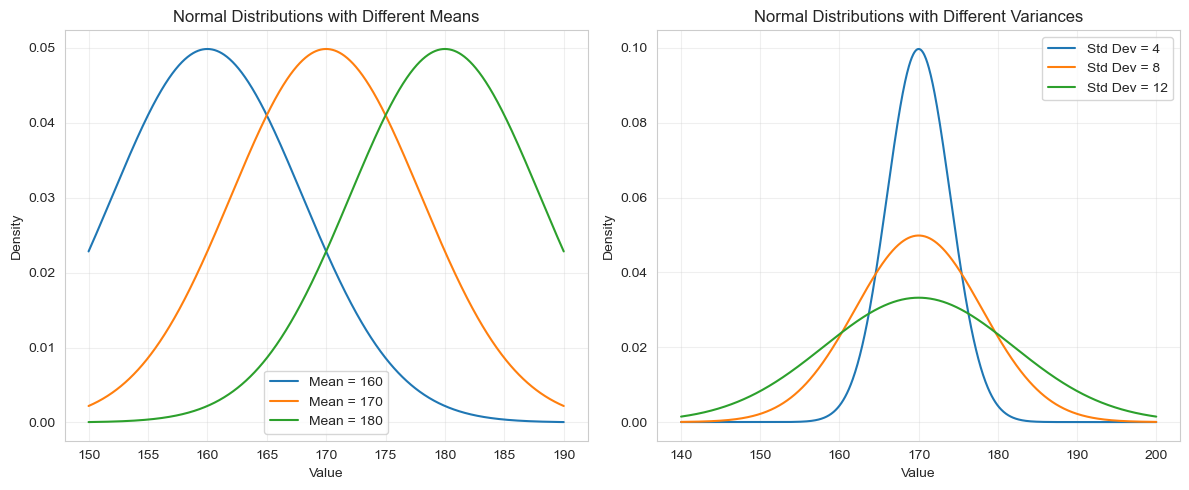

In [12]:
# Create distributions with different means and variances
plt.figure(figsize=(12, 5))

# Different means (fixed variance)
plt.subplot(1, 2, 1)
x = np.linspace(150, 190, 1000)
for mean in [160, 170, 180]:
    y = stats.norm.pdf(x, mean, 8)
    plt.plot(x, y, label=f'Mean = {mean}')

plt.title('Normal Distributions with Different Means')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)

# Different variances (fixed mean)
plt.subplot(1, 2, 2)
x = np.linspace(140, 200, 1000)
for std in [4, 8, 12]:
    y = stats.norm.pdf(x, 170, std)
    plt.plot(x, y, label=f'Std Dev = {std}')

plt.title('Normal Distributions with Different Variances')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Understanding the Impact of Mean and Variance on Normal Distributions

This visualization helps us understand two important ideas in probability and statistics:

1. What happens when we change the **mean** of a distribution (but keep the variance constant)?
2. What happens when we change the **variance** (but keep the mean constant)?

---

##### Chart 1: Normal Distributions with Different Means (Fixed Variance)

- In this chart, the variance (spread) is fixed, while the means are different: 160, 170, 180.
- The bell curves all have the same shape and spread because the standard deviation is the same.
- However, the center (average) of each curve shifts left or right depending on the mean.

> Changing the **mean** shifts the curve along the x-axis, but does not affect its shape or spread.

---

##### Chart 2: Normal Distributions with Different Variances (Fixed Mean)

- In this chart, the mean is fixed at 170, but the standard deviation (spread) changes: 4, 8, 12.
- All curves are centered at the same point (mean = 170), but their shape changes.
- A larger standard deviation means the curve is flatter and more spread out.
- A smaller standard deviation means the curve is taller and more concentrated around the mean.

> Changing the **variance** (or standard deviation) controls how tight or spread out the curve is around the mean.

---

##### Key Takeaways:

| Change | Effect | Visual Impact |
|--------|--------|----------------|
| Increase Mean | Shifts the curve left or right | Same shape, different location |
| Increase Variance | Spreads the curve out | Flatter, wider curve |

---

This is a powerful way to visualize how the parameters of a normal distribution affect its shape and behavior.

## 2. Probability Distributions

A probability distribution describes how the probabilities are distributed across the values of a random variable.

### Discrete Probability Distributions

A **Discrete Probability Distribution** describes the probability of each possible outcome of a *discrete* random variable.

> A discrete random variable is one that takes *countable* values — like whole numbers.


#### Key Characteristics of Discrete Probability Distribution:

1. The variable can only take specific, separate values (e.g., 0, 1, 2, 3...).
2. Each possible value has an associated probability.
3. The sum of all the probabilities must be 1.


#### Examples of Discrete Probability Distributions:

| Random Variable | Possible Values | Example Distribution |
|-----------------|-----------------|---------------------|
| Coin Toss | 0 (Tails), 1 (Heads) | P(0) = 0.5, P(1) = 0.5 |
| Roll a Die | 1, 2, 3, 4, 5, 6 | P(each number) = 1/6 |
| Number of Customers | 0, 1, 2, 3... | Based on historical data |


#### Visualization:

- Discrete Probability Distributions are often represented using *bar charts* — because the outcomes are distinct and separated.


#### Formula:

For a discrete random variable \(X\) with possible values \(x_1, x_2, x_3, \dots, x_n\):

$$
\sum P(X = x_i) = 1
$$

This means that the sum of the probabilities of all possible outcomes must equal 1.


In other words:  

$$
P(X = x_1) + P(X = x_2) + P(X = x_3) + \dots + P(X = x_n) = 1
$$


#### Real-World Use Cases:

- Number of defective products in a batch.
- Number of customer complaints per day.
- Number of sales per hour.


> In summary:  
A Discrete Probability Distribution helps us model the probability of *countable* outcomes in real-life scenarios where results are specific and separate.

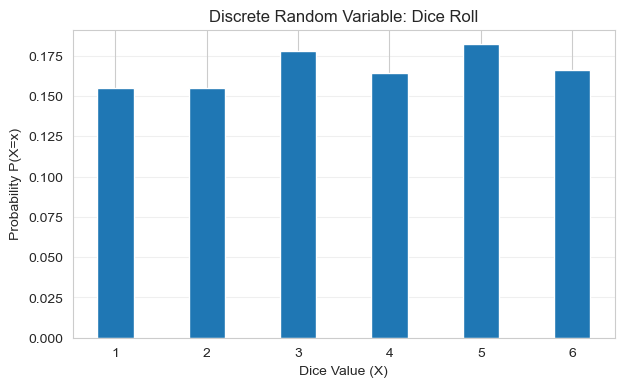

In [16]:
# Example 1: Discrete Random Variable - Dice Roll
plt.figure(figsize=(7, 4))

# Simulate 1000 rolls of a fair die
dice_rolls = np.random.randint(1, 7, size=1000)

# Count occurrences and calculate probabilities
unique_values, counts = np.unique(dice_rolls, return_counts=True)
probabilities = counts / len(dice_rolls)

# Plot as a bar chart (Probability Mass Function)
plt.bar(unique_values, probabilities, width=0.4)
plt.xticks(unique_values)
plt.xlabel('Dice Value (X)')
plt.ylabel('Probability P(X=x)')
plt.title('Discrete Random Variable: Dice Roll')
plt.grid(axis='y', alpha=0.3)
plt.show;

<details>
<summary>Example of a Discrete Probability Distribution — Dice Roll</summary>
    
#### Example of a Discrete Probability Distribution — Dice Roll 🎲

This chart shows the Probability Distribution of rolling a fair 6-sided die.

#### Why is this a Discrete Probability Distribution?

- The Random Variable here is the value of the dice roll (X).
- X can only take specific, *countable* values: 1, 2, 3, 4, 5, 6.
- We simulated 1000 rolls of the die.
- Then we counted how many times each number appeared.
- Finally, we calculated the probability of each outcome using:
  

$$
P(X = x) = \frac{\text{Count of }x}{\text{Total Rolls}}
$$
---

#### What does the Bar Chart Show?

- Each bar represents the probability of rolling a specific value.
- The height of each bar shows how likely each outcome is.
- For a fair die, we expect each outcome to have a probability close to \(\frac{1}{6} \approx 0.1667\).

---

#### Key Takeaway:

> "Discrete Probability Distributions deal with *countable* outcomes — and the probabilities of these outcomes can be visualized using a Bar Chart (Probability Mass Function - PMF)."

---

This is exactly how we model real-world discrete scenarios like:
- Rolling a die
- Tossing a coin
- Counting number of sales or customers
</details>

#### The Bernoulli Distribution — The Simplest Discrete Probability Distribution

The simplest discrete distribution is the **Bernoulli distribution**, which models a single binary outcome (success/failure) with probability of success p.

Examples of Bernoulli random variables:
- A single coin flip (heads/tails)
- Whether a customer buys a product (yes/no)
- If a student passes an exam (pass/fail)

Let's see what the Bernoulli distribution looks like:

A **Bernoulli Distribution** models a random experiment that has:

- Only **two possible outcomes**:
    - Success (usually coded as 1) with probability p
    - Failure (usually coded as 0) with probability 1 - p


#### Real-Life Examples of Bernoulli Distribution:

| Scenario | Success (1) | Failure (0) |
|----------|--------------|-------------|
| Tossing a coin | Heads | Tails |
| Passing an exam | Pass | Fail |
| Customer purchase | Buy | Don't buy |
| Email Classification | Spam | Not Spam |


#### Probability Mass Function (PMF) of Bernoulli Distribution:

Let \(X\) be a Bernoulli random variable.

- \(p\) = Probability of Success (1)
- \(1-p\) = Probability of Failure (0)

The PMF is:

$$
P(X=x) =
\begin{cases}
p & \text{if } x=1 \\
1-p & \text{if } x=0
\end{cases}
$$


#### Properties of Bernoulli Distribution:

- Random Variable: \(X \in \{0, 1\}\)
- Mean (Expected Value): \(E[X] = p\)
- Variance: \(Var(X) = p(1-p)\)

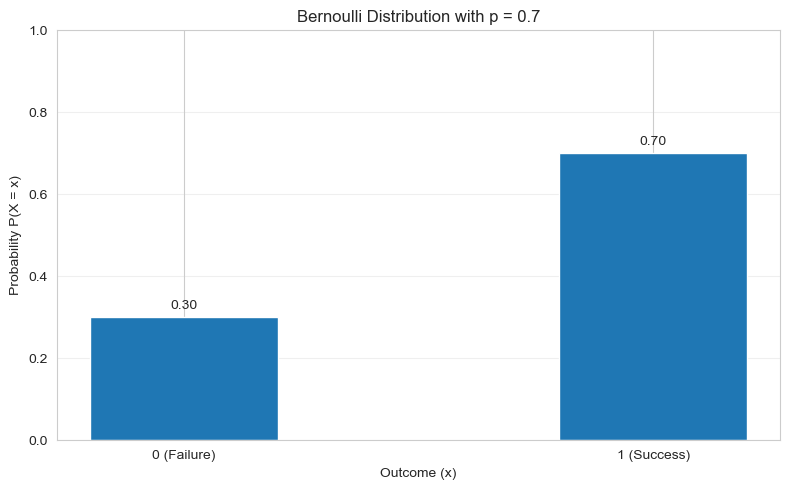

Bernoulli Distribution (p = 0.7):
Mean: 0.7
Variance: 0.21000000000000002


In [22]:
# Bernoulli distribution with parameter p
p = 0.7  # Probability of success

# Possible outcomes: 0 (failure), 1 (success)
x_values = [0, 1]
pmf_values = [1-p, p]  # P(X=0) = 1-p, P(X=1) = p

plt.figure(figsize=(8, 5))
plt.bar(x_values, pmf_values, width=0.4)
plt.xticks(x_values, ['0 (Failure)', '1 (Success)'])
plt.xlabel('Outcome (x)')
plt.ylabel('Probability P(X = x)')
plt.title(f'Bernoulli Distribution with p = {p}')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)

# Add probability values above each bar
for i in range(len(x_values)):
    plt.text(x_values[i], pmf_values[i] + 0.02, f'{pmf_values[i]:.2f}', ha='center')

plt.tight_layout()
plt.show()

# Properties of Bernoulli
mean = p
variance = p * (1-p)
print(f"Bernoulli Distribution (p = {p}):")
print(f"Mean: {mean}")
print(f"Variance: {variance}")

> 🤔 **Think About It**: What happens to the variance of a Bernoulli distribution as p gets closer to 0 or 1? When is the variance highest?

<details>
<summary><b>The variance of a Bernoulli distribution</b></summary>
The variance of a Bernoulli distribution is:

$$
Var(X) = p(1 - p)
$$

- As **p → 0 or 1**, the variance decreases (less uncertainty).
- The **maximum variance** occurs when **p = 0.5** (most uncertainty).

When p = 0.5, both outcomes (0 and 1) are equally likely — so the randomness is highest.
</details>

#### The Binomial Distribution

The **Binomial distribution** extends the Bernoulli to model the number of successes in a fixed number of independent trials.

The Binomial Distribution models the number of successes in a fixed number of *`independent`* trials, where each trial has only two possible outcomes:

- Success (with probability p)
- Failure (with probability 1 - p)


#### Real-Life Examples:

| Scenario | What is X? |
|----------|------------|
| Toss a coin 10 times | Number of Heads |
| Check 20 products | Number of defective items |
| Send 100 marketing emails | Number of customers who buy |


#### Key Conditions for Binomial Distribution:

1. Fixed number of trials (n)
2. Only two outcomes per trial (success or failure)
3. Trials are independent
4. Probability of success (p) stays the same for each trial

#### Probability Mass Function (PMF):

The probability of getting exactly \(k\) successes in \(n\) trials is:

$$
P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}
$$

Where:

$$
\binom{n}{k} = \frac{n!}{k!(n-k)!}
$$ represents the number of ways to choose \(k\) successes from \(n\) trials.


#### Mean and Variance:

| Statistic | Formula |
|-----------|---------|
| Mean (Expected Value) | \( E[X] = n \times p \) |
| Variance | \( Var(X) = n \times p \times (1-p) \) |

##### Formulas:

Mean:

$$
E[X] = n \times p
$$

Variance:

$$
Var(X) = n \times p \times (1-p)
$$

> In summary:  
The Binomial Distribution is like repeating a Bernoulli trial *n* times — and counting how many successes you get.


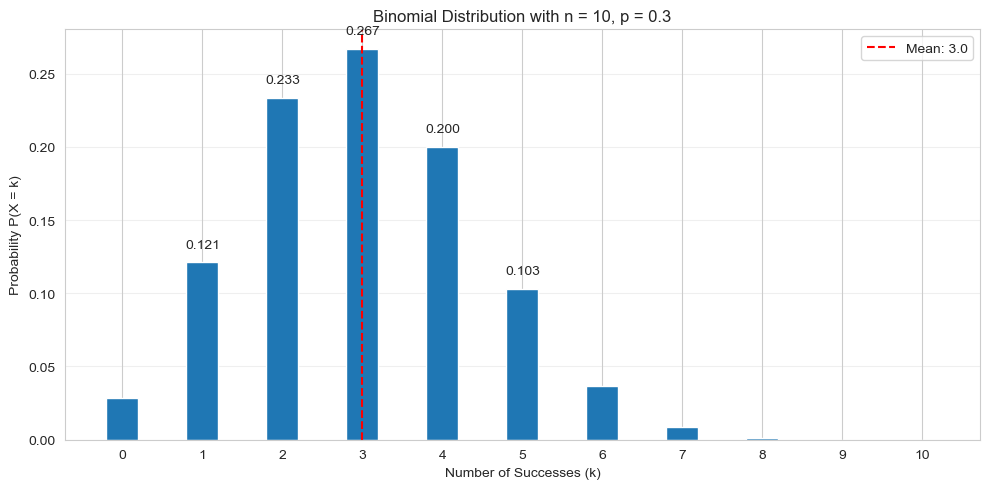

Binomial Distribution (n = 10, p = 0.3):
Mean: 3.0
Variance: 2.0999999999999996
Standard Deviation: 1.4491


In [23]:
# Binomial distribution parameters
n = 10  # Number of trials
p = 0.3  # Probability of success in a single trial

# Calculate PMF using scipy's stats.binom
x_values = np.arange(0, n+1)  # Possible outcomes: 0, 1, 2, ..., n
pmf_values = stats.binom.pmf(x_values, n, p)

# Plot the PMF
plt.figure(figsize=(10, 5))
plt.bar(x_values, pmf_values, width=0.4)
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability P(X = k)')
plt.title(f'Binomial Distribution with n = {n}, p = {p}')
plt.xticks(x_values)
plt.grid(axis='y', alpha=0.3)

# Add labels for the most likely outcomes
for i in range(len(x_values)):
    if pmf_values[i] > 0.05:  # Only label bars with significant probability
        plt.text(x_values[i], pmf_values[i] + 0.01, f'{pmf_values[i]:.3f}', ha='center')

# Calculate and display mean and variance
mean = n * p
variance = n * p * (1-p)
plt.axvline(x=mean, color='r', linestyle='--', label=f'Mean: {mean}')

plt.legend()
plt.tight_layout()
plt.show()

print(f"Binomial Distribution (n = {n}, p = {p}):")
print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {np.sqrt(variance):.4f}")


Let's see how changing n and p affects the shape of the Binomial distribution:



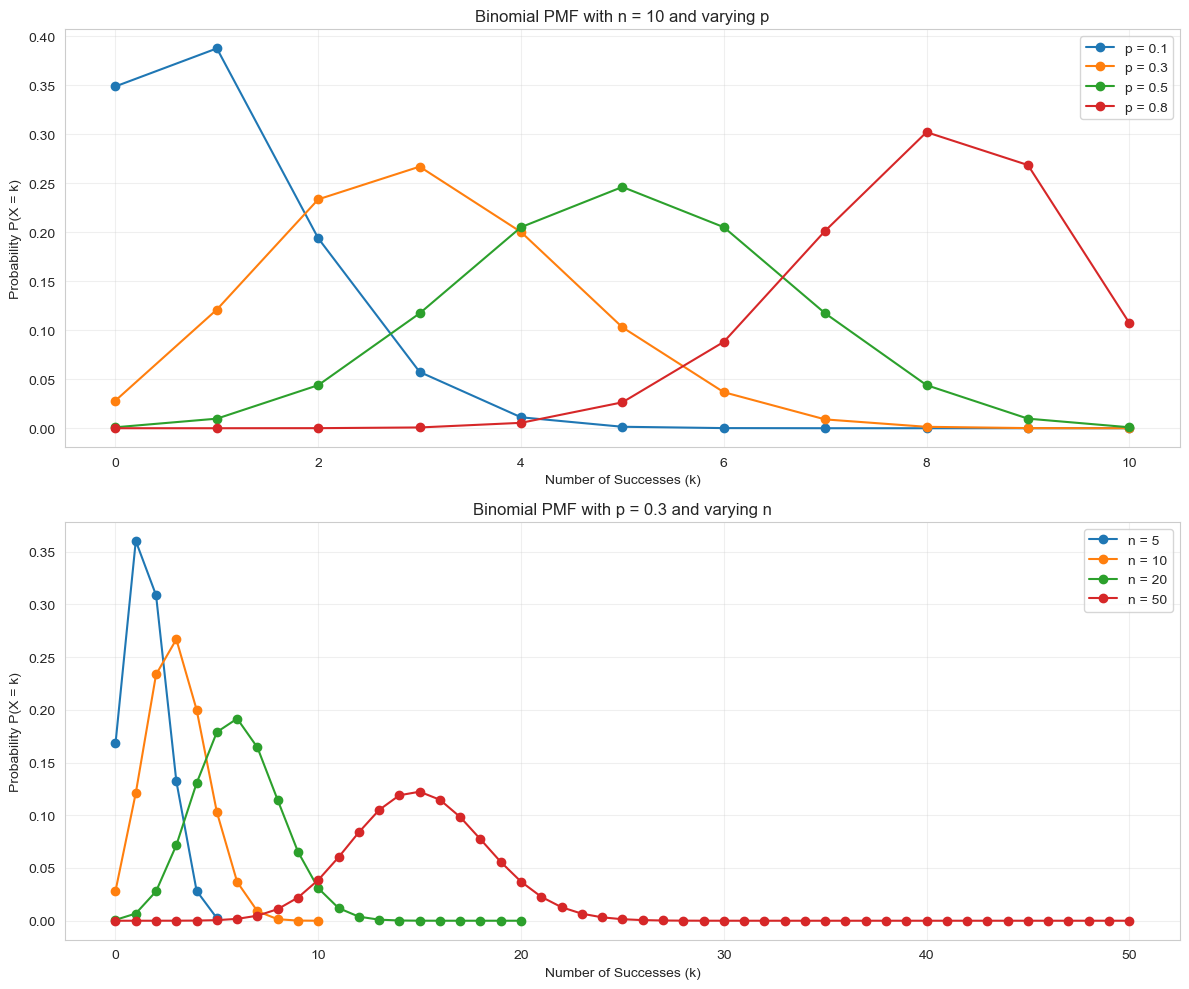

In [24]:
# How changing parameters affects the binomial shape
plt.figure(figsize=(12, 10))

# 1. Varying p with fixed n
plt.subplot(2, 1, 1)
n_fixed = 10
p_values = [0.1, 0.3, 0.5, 0.8]

for p in p_values:
    pmf = stats.binom.pmf(np.arange(0, n_fixed+1), n_fixed, p)
    plt.plot(np.arange(0, n_fixed+1), pmf, 'o-', label=f'p = {p}')
    
plt.title(f'Binomial PMF with n = {n_fixed} and varying p')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability P(X = k)')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Varying n with fixed p
plt.subplot(2, 1, 2)
p_fixed = 0.3
n_values = [5, 10, 20, 50]

for n in n_values:
    x = np.arange(0, n+1)
    pmf = stats.binom.pmf(x, n, p_fixed)
    plt.plot(x, pmf, 'o-', label=f'n = {n}')
    
plt.title(f'Binomial PMF with p = {p_fixed} and varying n')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability P(X = k)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### What does this Binomial Distribution Visualization Show?

This visualization helps us understand how the shape of a Binomial Distribution changes when we vary:

- The probability of success \(p\)
- The number of trials \(n\)

<details>
<summary>Chart 1: Fixed n = 10, Varying p</summary>

#### What happens when p changes?

- n is fixed at 10.
- p is changed: 0.1, 0.3, 0.5, 0.8.

| Value of p | Observation | Meaning |
|------------|-------------|---------|
| Small p (0.1) | Distribution skewed to the left | Few successes expected |
| p = 0.5 | Symmetric distribution | Balanced chance of success/failure |
| Large p (0.8) | Distribution skewed to the right | Many successes expected |

> *The higher the p, the more the distribution shifts to the right (more successes).*

</details>

<details>
<summary>Chart 2: Fixed p = 0.3, Varying n</summary>

#### What happens when n changes?

- p is fixed at 0.3.
- n is changed: 5, 10, 20, 50.

| Value of n | Observation | Meaning |
|------------|-------------|---------|
| Small n (5) | Narrow distribution | Few possible outcomes |
| Large n (50) | Wider & smoother distribution | More possible outcomes, approaches Normal distribution |

> *As n increases, the distribution spreads out and becomes smoother — this is related to the Central Limit Theorem.*

</details>

#### Final Takeaway:

> *"In a Binomial Distribution — p controls the skewness (direction), while n controls the spread (width) of the distribution."*

> 💡 **Key Insight**: As n increases, the Binomial distribution starts looking more like a normal distribution (bell curve). This is a special case of the Central Limit Theorem that we'll explore later.

#### Simulating Binomial Random Variables

Let's simulate binomial random variables to see the distribution in action:

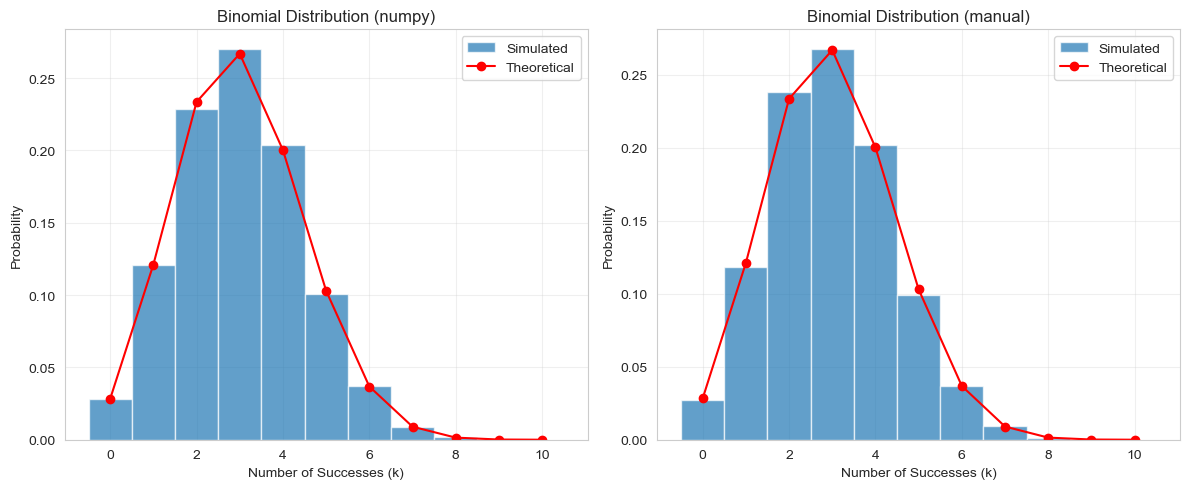

In [25]:
# Simulate binomial random variables
n = 10  # Number of trials
p = 0.3  # Probability of success

# Method 1: Using numpy's binomial function
samples_direct = np.random.binomial(n, p, size=10000)

# Method 2: Manually simulating `n` Bernoulli trials
samples_manual = np.zeros(10000)
for i in range(10000):
    # Simulate n Bernoulli trials
    trials = np.random.random(n) < p
    # Count the number of successes
    samples_manual[i] = np.sum(trials)

# Compare the empirical and theoretical distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# Histogram of simulated values
plt.hist(samples_direct, bins=np.arange(-0.5, n+1.5), density=True, alpha=0.7, 
         label='Simulated')
# Overlay the theoretical PMF
x = np.arange(0, n+1)
pmf = stats.binom.pmf(x, n, p)
plt.plot(x, pmf, 'ro-', label='Theoretical')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability')
plt.title('Binomial Distribution (numpy)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(samples_manual, bins=np.arange(-0.5, n+1.5), density=True, alpha=0.7,
         label='Simulated')
plt.plot(x, pmf, 'ro-', label='Theoretical')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability')
plt.title('Binomial Distribution (manual)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### What is this code trying to show?

This code compares two ways of simulating a Binomial Distribution:

1. Using numpy's built-in `np.random.binomial()` function.
2. Manually simulating repeated Bernoulli trials and counting successes.


<details>
<summary>Method 1: Direct Simulation using numpy</summary>

- We simulate 10,000 samples from a Binomial Distribution with:

    - \(n = 10\) trials  
    - \(p = 0.3\) probability of success per trial  

- Python does this internally using fast algorithms.


</details>

<details>
<summary>Method 2: Manual Simulation using Bernoulli Trials</summary>

- We simulate each of the 10 trials as a Bernoulli experiment (success or failure).

- For each of the 10,000 samples:

    - Count the number of successes across the 10 trials.

> This is slower but shows how the Binomial Distribution is built on repeated Bernoulli trials.


</details>


#### What does the Output Visualization Show?

- Both histograms (direct simulation vs manual Bernoulli trials) match the same theoretical Binomial Distribution.

- The red line is the theoretical PMF (Probability Mass Function).

#### Key Takeaway:

> *"Binomial Distribution is just the result of repeating Bernoulli trials many times and counting the number of successes."*

> *"In practice, we can simulate Binomial random variables directly — but it's powerful to understand how it comes from Bernoulli trials."*


In [26]:
# Calculate the empirical mean and variance
empirical_mean = np.mean(samples_direct)
empirical_var = np.var(samples_direct)
theoretical_mean = n * p
theoretical_var = n * p * (1-p)

print("Comparison of Statistics:")
print(f"Empirical Mean: {empirical_mean:.4f} (Theoretical: {theoretical_mean})")
print(f"Empirical Variance: {empirical_var:.4f} (Theoretical: {theoretical_var})")

Comparison of Statistics:
Empirical Mean: 3.0068 (Theoretical: 3.0)
Empirical Variance: 2.0966 (Theoretical: 2.0999999999999996)


> 💡 **Key Insight**: Bernoulli is a special case of the Binomial Distribution where 𝑛 = 1

<details>
<summary>Advanced 📚: Poisson Distribution</summary>

The **Poisson distribution** models the number of events occurring in a fixed interval of time or space, assuming the events occur independently at a constant average rate.

The **Poisson Distribution** models the probability of a given number of events happening in a fixed interval of time or space — *when the events happen independently* and at a *constant average rate*.


#### Real-Life Examples of Poisson Distribution:

| Scenario | What is X? |
|----------|------------|
| Customers entering a shop per hour | Number of customers |
| Emails received per minute | Number of emails |
| System crashes per day | Number of crashes |
| Calls to a call center per hour | Number of calls |


#### Key Assumptions:

1. Events occur independently.
2. Events occur at a constant average rate (\(\lambda\)).
3. The probability of more than one event happening in a tiny instant is very small.


#### Probability Mass Function (PMF):

The probability of observing exactly \(k\) events is:

$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

Where:
- \(\lambda\) = Average number of events per interval (rate parameter)
- \(k\) = Number of events (0, 1, 2, ...)
- \(e\) = Euler's number (approx. 2.718)


#### Mean and Variance of Poisson Distribution:

| Statistic | Formula |
|-----------|---------|
| Mean | \(\lambda\) |
| Variance | \(\lambda\) |


### Final Takeaway:

> *"Poisson Distribution models the number of rare or random events happening in a fixed time or space — based on a known average rate (\(\lambda\))."*


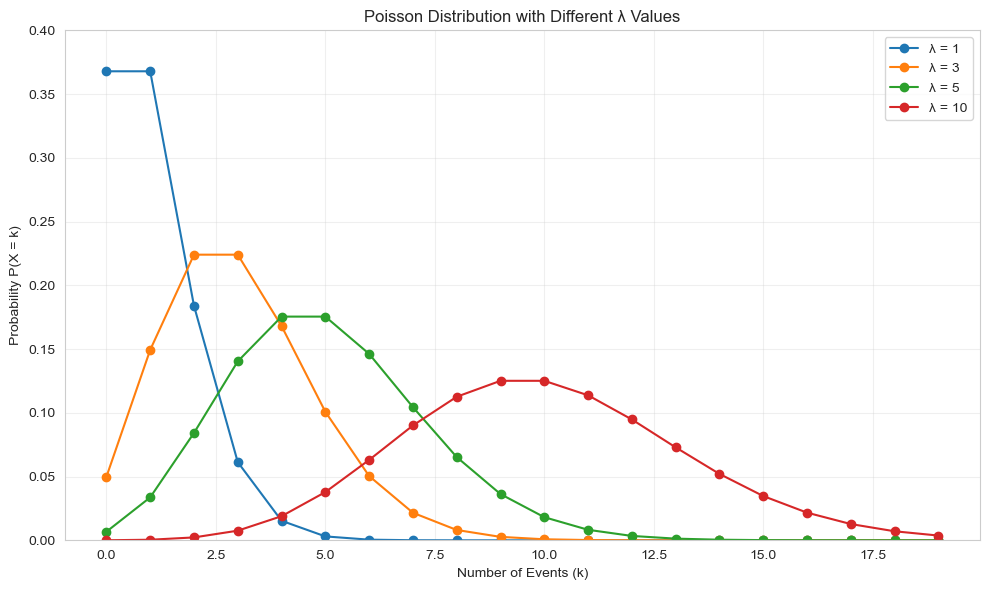

In [34]:
# Poisson distribution
lambda_values = [1, 3, 5, 10]
plt.figure(figsize=(10, 6))

for lam in lambda_values:
    # Calculate PMF for k = 0, 1, 2, ..., max(20, 2*lambda)
    k = np.arange(0, max(20, 2*lam))
    pmf = stats.poisson.pmf(k, lam)
    plt.plot(k, pmf, 'o-', label=f'λ = {lam}')

plt.title('Poisson Distribution with Different λ Values')
plt.xlabel('Number of Events (k)')
plt.ylabel('Probability P(X = k)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 0.4)
plt.tight_layout()
plt.show()


#### Poisson Distribution Visualization Explanation

<details>
<summary>Click here to see the explanation</summary>

#### What does this Poisson Distribution visualization show?

This chart shows how the shape of the Poisson Distribution changes when we vary the average rate of events (\(\lambda\)).

Remember:

- \(\lambda\) = Average number of events per time or space interval.

---

#### Observations from the Chart:

| Value of \(\lambda\) | Shape of Distribution | Meaning |
|----------------------|-----------------------|---------|
| Small \(\lambda\) (1, 3) | Skewed to the right | Events are rare. Most outcomes are small (0, 1, 2). |
| Larger \(\lambda\) (5, 10) | More symmetric | Events happen more often. Distribution spreads out and starts to look like a Normal Distribution. |

---

#### Key Takeaway:

> *"The higher the value of \(\lambda\), the more frequent the events — and the wider and more symmetric the distribution becomes."*

> *"This is why Poisson Distribution is used to model rare events over time or space — like customer arrivals, machine failures, or phone calls."*


#### Python Recap:

We used:

```python
stats.poisson.pmf(x, mu=lam)


<detials>

#### Relationship between Binomial Distribution and Poisson Distribution

<details>
<summary>Click here to see the explanation</summary>

#### Can we say Poisson is related to Binomial?

✅ Yes — Poisson Distribution is *derived* from the Binomial Distribution under certain conditions.

####  How are they connected?

Poisson Distribution comes from the Binomial Distribution when:

- The number of trials \(n\) is very large.
- The probability of success \(p\) is very small.
- But the expected number of successes \(n \times p\) stays constant.

This constant is called \(\lambda\) (lambda), which is the average rate of events in the Poisson Distribution.


####  Comparison Table:

| Binomial Distribution | Poisson Distribution |
|----------------------|----------------------|
| Fixed number of trials \(n\) | Fixed time or space interval |
| Fixed probability of success \(p\) | Very small \(p\), very large \(n\) |
| Counts number of successes | Counts number of events |
| Mean = \(n \times p\) | Mean = \(\lambda\)


<detials>

#### How is the Poisson PMF Calculated?

<details>
<summary>Click here to see the explanation</summary>

#### PMF Formula for Poisson Distribution:

To calculate the probability of observing exactly \(k\) events:

$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

Where:
- \(X\) = Poisson Random Variable
- \(k\) = Number of events we want
- \(\lambda\) = Average number of events (rate)
- \(e\) = Euler's number (\( \approx 2.718 \))
- \(k!\) = Factorial of \(k\)


#### What is this formula saying?

> "Given an average rate of events (\(\lambda\)), this formula calculates the probability of observing exactly \(k\) events in a fixed interval."

#### In Python (Behind the scenes):

```python
pmf = (lam**k * np.exp(-lam)) / math.factorial(k)


`But we can use`

pmf = stats.poisson.pmf(k, mu=lam)
</details> 

</details>

### Continuous Probability Distributions

For continuous random variables, we use a **Probability Density Function (PDF)** instead of a PMF. The key difference is that for continuous variables, the probability at any exact point is zero! Instead, we calculate probabilities over ranges of values.

#### Futher Explanation of Continuous Probability Distribution.

<details>
<summary>Click here to see the explanation</summary>

#### Key Idea:

A **Continuous Probability Distribution** models random variables that can take *any value within a range* — not just whole numbers.

> *"Instead of counting outcomes (like in discrete), we measure outcomes — like height, weight, time, distance, temperature."*

---

#### Key Properties:

- Values are infinite within an interval.
- The probability of a *single exact value* is 0.
- We only calculate probability over an *interval* — e.g., \(P(a < X < b)\).

### Final Takeaway:

> *"Continuous Distributions model real-world measurements that are not countable but measurable."*

> *"Normal Distribution is the most popular continuous distribution — symmetric, bell-shaped, and found everywhere in data science and machine learning."*

</details>

#### Normal Distribution (Gaussian)

The **Normal distribution** (also called Gaussian) is the most important continuous distribution. It appears naturally in many phenomena and has that familiar `"bell curve"` shape.

Examples of Normal random variables:
- Heights of people in a population
- Measurement errors
- IQ scores

The Normal distribution is defined by two parameters:
- μ (mu): The mean (center of the distribution)
- σ (sigma): The standard deviation (spread of the distribution)

#### Probability Density Function (PDF):

The PDF of a Normal Distribution looks like this:

$$
f(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{ -\frac{(x - \mu)^2}{2\sigma^2} }
$$

- \(x\) = Random Variable

#### Why is Normal Distribution Important?

- Many natural phenomena follow it (height, weight, IQ scores).
- It's the foundation of many Machine Learning algorithms.
- Central Limit Theorem says: "Sums or averages of many small random variables tend to follow a Normal Distribution."

Let's explore the Normal distribution:

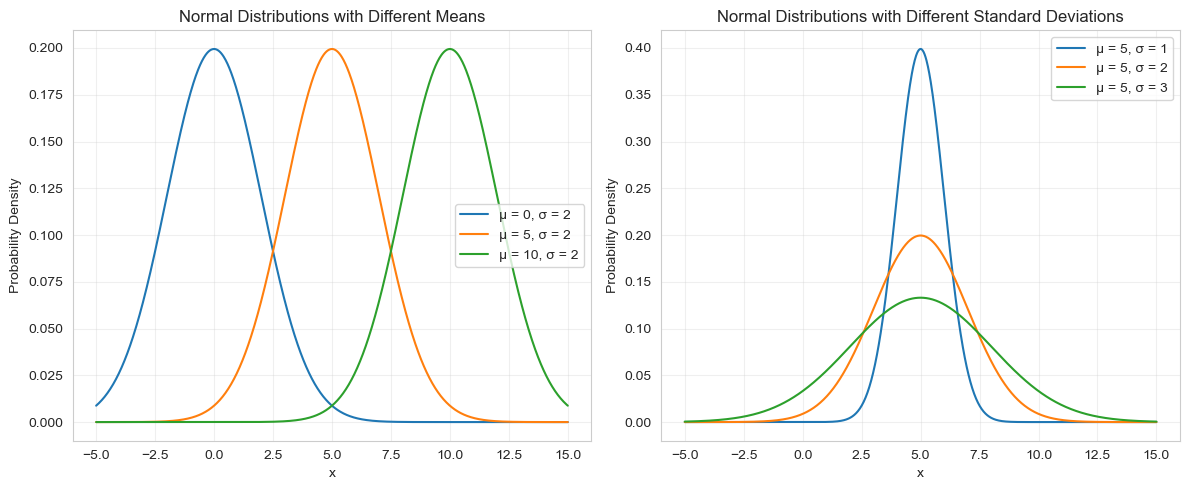

In [28]:
# Normal distribution with different parameters
plt.figure(figsize=(12, 5))

# Plot normal distributions with different parameters
x = np.linspace(-5, 15, 1000)

# Different means, same standard deviation
plt.subplot(1, 2, 1)
for mu in [0, 5, 10]:
    pdf = stats.norm.pdf(x, loc=mu, scale=2)
    plt.plot(x, pdf, label=f'μ = {mu}, σ = 2')

plt.title('Normal Distributions with Different Means')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)

# Same mean, different standard deviations
plt.subplot(1, 2, 2)
for sigma in [1, 2, 3]:
    pdf = stats.norm.pdf(x, loc=5, scale=sigma)
    plt.plot(x, pdf, label=f'μ = 5, σ = {sigma}')

plt.title('Normal Distributions with Different Standard Deviations')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



#### Important Properties of the Normal Distribution

The Normal distribution has several important properties:

1. **Symmetry**: It's symmetric around the mean
2. **Bell Shape**: Most values cluster around the mean
3. **68-95-99.7 Rule**: Approximately 68% of values fall within 1 standard deviation of the mean, 95% within 2 standard deviations, and 99.7% within 3 standard deviations

#### The 68-95-99.7 Rule (Empirical Rule)

<details>
<summary>Click here to see the explanation</summary>

#### What is the 68-95-99.7 Rule?

This rule applies to data that follows a Normal Distribution (bell-shaped curve).

It tells us:

| Range | % of Data | Meaning |
|-------|-----------|---------|
| \(\mu \pm 1\sigma\) | About 68% | Most values are within 1 standard deviation of the mean. |
| \(\mu \pm 2\sigma\) | About 95% | Almost all values are within 2 standard deviations. |
| \(\mu \pm 3\sigma\) | About 99.7% | Nearly every value is within 3 standard deviations. |


#### What does this mean practically?

> *"If you know the mean and standard deviation of your data — you can quickly estimate where most of your data points lie."*



Let's visualize the 68-95-99.7 rule:



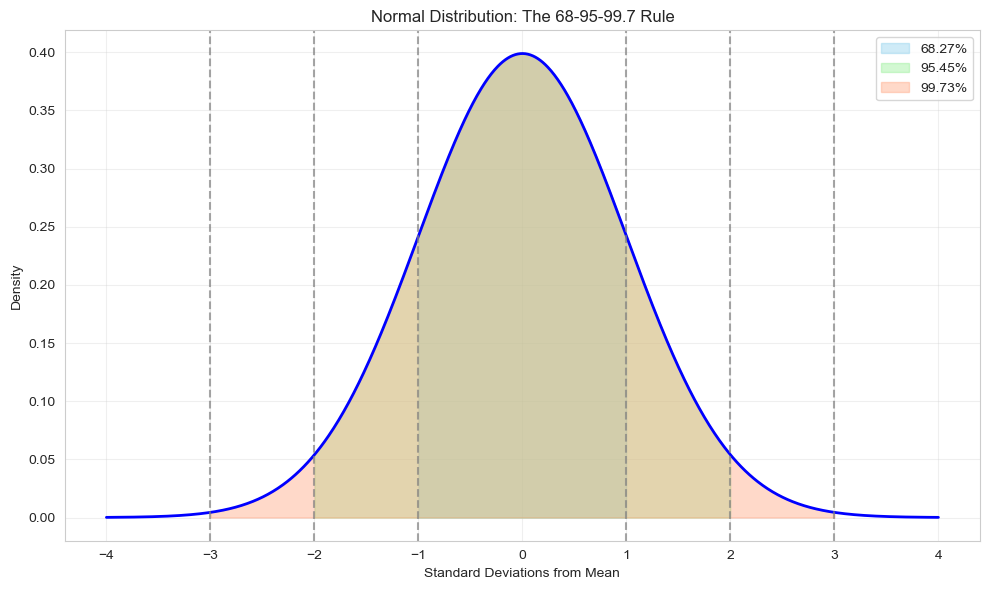

In [29]:
# Demonstrate the 68-95-99.7 rule
mu = 0
sigma = 1
x = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(x, loc=mu, scale=sigma)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, 'b-', linewidth=2)

# Calculate the boundaries for different standard deviations
boundaries = [
    (mu - sigma, mu + sigma, '68.27%', 'skyblue'),
    (mu - 2*sigma, mu + 2*sigma, '95.45%', 'lightgreen'),
    (mu - 3*sigma, mu + 3*sigma, '99.73%', 'lightsalmon')
]

# Shade the areas and add percentage labels
for left, right, label, color in boundaries:
    x_range = x[(x >= left) & (x <= right)]
    y_range = pdf[(x >= left) & (x <= right)]
    plt.fill_between(x_range, y_range, color=color, alpha=0.4, label=label)
    
    # Add vertical lines at the boundaries
    plt.axvline(x=left, color='gray', linestyle='--', alpha=0.7)
    plt.axvline(x=right, color='gray', linestyle='--', alpha=0.7)

plt.xlabel('Standard Deviations from Mean')
plt.ylabel('Density')
plt.title('Normal Distribution: The 68-95-99.7 Rule')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



#### Working with Normal Probabilities

To find probabilities with a Normal distribution, we need to look at areas under the curve. We can use scipy's `norm.cdf` function to find these probabilities:



In [30]:
# Calculate probabilities with the normal distribution
mu = 70  # Mean
sigma = 8  # Standard deviation

# Calculate P(X < 60)
p_less_than_60 = stats.norm.cdf(60, loc=mu, scale=sigma)

# Calculate P(65 < X < 75)
p_between_65_and_75 = stats.norm.cdf(75, loc=mu, scale=sigma) - stats.norm.cdf(65, loc=mu, scale=sigma)

# Calculate P(X > 85)
p_greater_than_85 = 1 - stats.norm.cdf(85, loc=mu, scale=sigma)

print(f"Normal Distribution with μ = {mu}, σ = {sigma}")
print(f"P(X < 60) = {p_less_than_60:.4f}")
print(f"P(65 < X < 75) = {p_between_65_and_75:.4f}")
print(f"P(X > 85) = {p_greater_than_85:.4f}")

Normal Distribution with μ = 70, σ = 8
P(X < 60) = 0.1056
P(65 < X < 75) = 0.4680
P(X > 85) = 0.0304


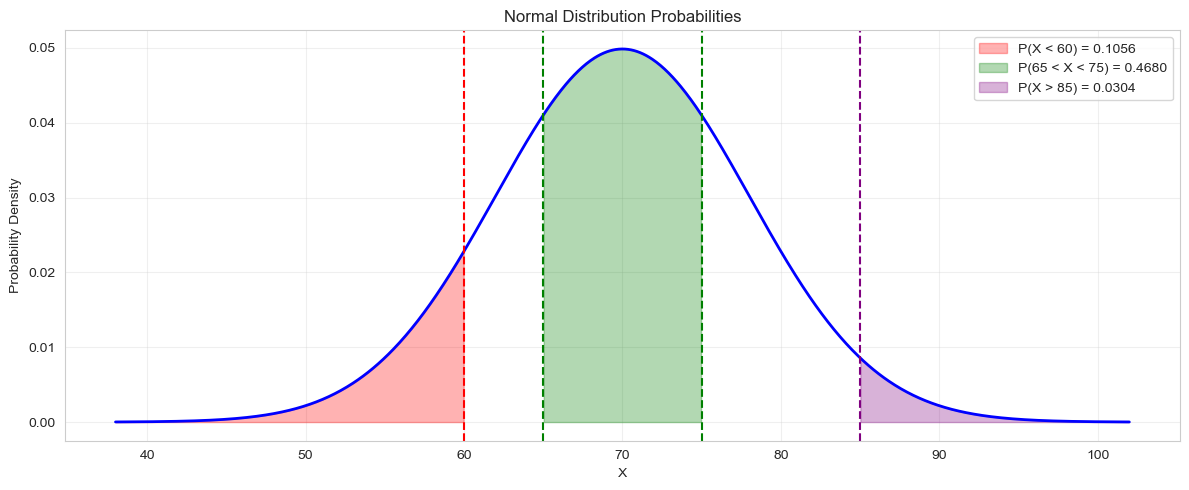

In [31]:
# Visualize these probabilities
plt.figure(figsize=(12, 5))

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = stats.norm.pdf(x, loc=mu, scale=sigma)

plt.plot(x, pdf, 'b-', linewidth=2)

# Shade P(X < 60)
x_less_60 = x[x <= 60]
plt.fill_between(x_less_60, stats.norm.pdf(x_less_60, loc=mu, scale=sigma), 
                 color='red', alpha=0.3, label=f'P(X < 60) = {p_less_than_60:.4f}')

# Shade P(65 < X < 75)
x_between = x[(x > 65) & (x < 75)]
plt.fill_between(x_between, stats.norm.pdf(x_between, loc=mu, scale=sigma), 
                 color='green', alpha=0.3, label=f'P(65 < X < 75) = {p_between_65_and_75:.4f}')

# Shade P(X > 85)
x_greater_85 = x[x >= 85]
plt.fill_between(x_greater_85, stats.norm.pdf(x_greater_85, loc=mu, scale=sigma), 
                 color='purple', alpha=0.3, label=f'P(X > 85) = {p_greater_than_85:.4f}')

plt.axvline(x=60, color='red', linestyle='--')
plt.axvline(x=65, color='green', linestyle='--')
plt.axvline(x=75, color='green', linestyle='--')
plt.axvline(x=85, color='purple', linestyle='--')

plt.title('Normal Distribution Probabilities')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<detials>


<details>
<summary>Advanced 📚: Other Continuous Distributions</summary>

There are many other important continuous distributions:

<details>
<summary>Click here to see the explanation</summary>

    
<details>
<summary>Uniform Distribution</summary>

#### 1. Uniform Distribution
    
> *Every value within an interval is equally likely.*


##### Characteristics:

- It has a lower limit \(a\) and an upper limit \(b\).
- Probability is constant between \(a\) and \(b\).
- Outside this range, the probability is 0.


##### Probability Density Function (PDF):

$$
f(x) = \frac{1}{b - a} \quad \text{for } a \leq x \leq b
$$


##### Example Use Cases:

- Random number generation
- Simulating equally likely outcomes
- Assigning probabilities when we know nothing else
</details>


<details>
<summary>Exponential Distribution</summary>
    
#### 2. Exponential Distribution

> *Models the time between events that happen randomly at a constant rate.*

##### Characteristics:

- Describes waiting times or time until the next event.
- Has a "memoryless" property:
  
> *Past events do not affect future probabilities.*

##### Probability Density Function (PDF):

$$
f(x) = \lambda e^{-\lambda x} \quad \text{for } x \geq 0
$$

Where \( \lambda \) is the rate parameter (average number of events per unit time).

##### Example Use Cases:

- Time between customer arrivals
- Time until a machine fails
- Time until receiving a phone call
</details>


<details>
<summary>Beta Distribution</summary>

#### 3. Beta Distribution

> *Used for modeling probabilities and proportions between 0 and 1.*

##### Characteristics:

- Defined over the interval \(0 \leq x \leq 1\).
- Controlled by two shape parameters: \( \alpha \) and \( \beta \).
- Very flexible — it can model different shapes depending on \( \alpha \) and \( \beta \).


##### Probability Density Function (PDF):

$$
f(x) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)}
$$

Where \(B(\alpha, \beta)\) is a constant (Beta function) for normalization.


##### Example Use Cases:

- Modeling probabilities
- Modeling conversion rates
- Bayesian statistics
- Modeling proportions like "probability of success"
</details>

<details>
<summary>Final Takeaway</summary>
    
#### Final Takeaway:

| Distribution | Best For | Key Idea |
|--------------|----------|----------|
| Uniform | Random numbers over an interval | All values equally likely |
| Exponential | Time between random events | Memoryless waiting time |
| Beta | Probabilities or proportions | Flexible modeling between 0 and 1 |
</details>

</details>

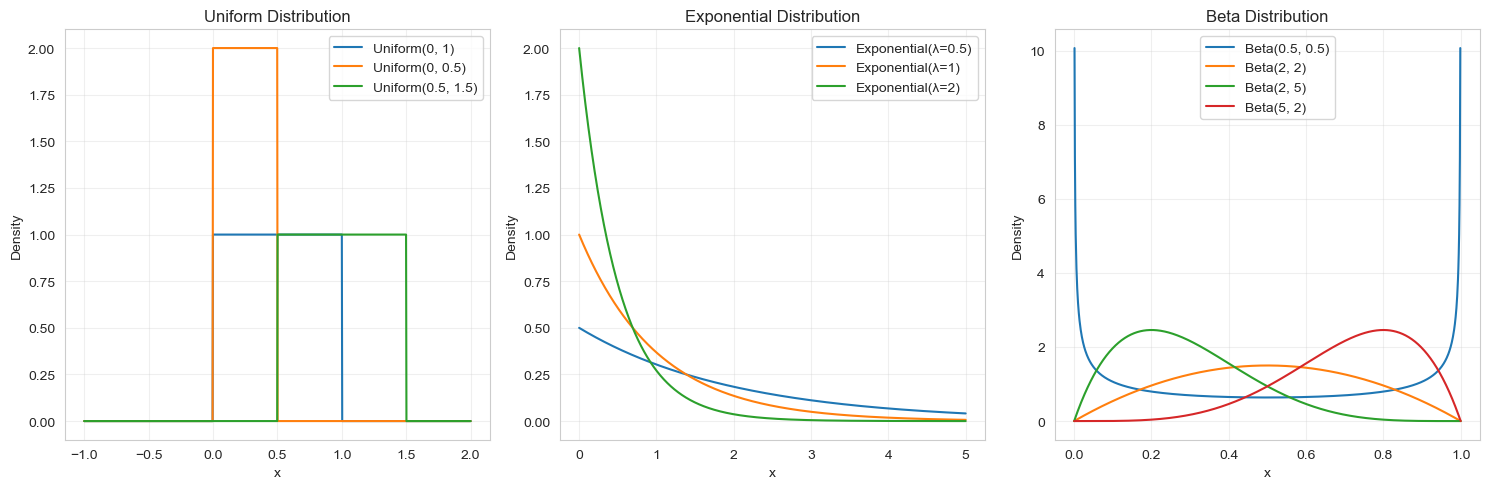

In [32]:
plt.figure(figsize=(15, 5))

# Uniform distribution
plt.subplot(1, 3, 1)
x = np.linspace(-1, 2, 1000)
for a, b in [(0, 1), (0, 0.5), (0.5, 1.5)]:
    plt.plot(x, stats.uniform.pdf(x, loc=a, scale=b-a), label=f'Uniform({a}, {b})')

plt.title('Uniform Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)

# Exponential distribution
plt.subplot(1, 3, 2)
x = np.linspace(0, 5, 1000)
for lam in [0.5, 1, 2]:
    plt.plot(x, stats.expon.pdf(x, scale=1/lam), label=f'Exponential(λ={lam})')

plt.title('Exponential Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)

# Beta distribution
plt.subplot(1, 3, 3)
x = np.linspace(0, 1, 1000)
for a, b in [(0.5, 0.5), (2, 2), (2, 5), (5, 2)]:
    plt.plot(x, stats.beta.pdf(x, a, b), label=f'Beta({a}, {b})')

plt.title('Beta Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

</details>

## 3. The Central Limit Theorem

The **Central Limit Theorem (CLT)** is one of the most important results in probability. It states that the sum (or average) of a large number of independent, identically distributed random variables approaches a normal distribution, regardless of the original distribution.

In simpler terms: If you take a large enough sample from any population and calculate the sample mean, the distribution of those sample means will be approximately normal, even if the original population isn't normally distributed!

Let's demonstrate the CLT by sampling from a uniform distribution:

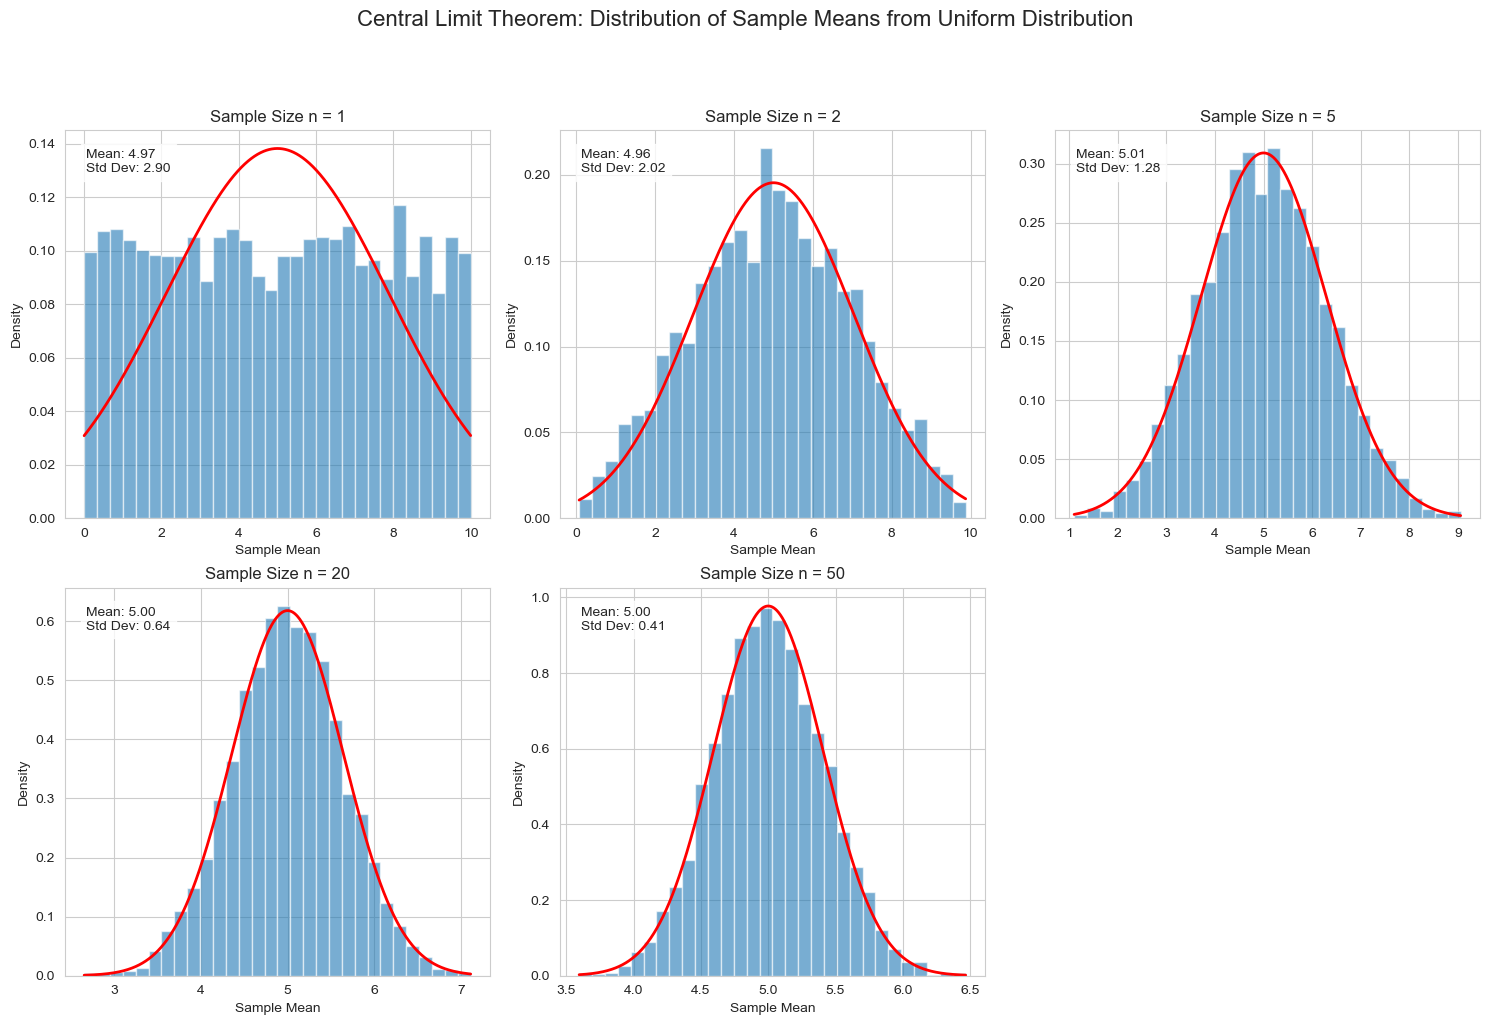

In [33]:
# Demonstrate the Central Limit Theorem
np.random.seed(42)

# Choose a non-normal distribution (uniform)
a, b = 0, 10  # Uniform parameters
mu_true = (a + b) / 2  # True mean
sigma_true = np.sqrt((b - a)**2 / 12)  # True standard deviation

# Sample sizes to try
sample_sizes = [1, 2, 5, 20, 50]
num_samples = 5000  # Number of sample means to generate for each sample size

plt.figure(figsize=(15, 10))

for i, n in enumerate(sample_sizes):
    plt.subplot(2, 3, i+1)
    
    # Generate sample means
    sample_means = np.zeros(num_samples)
    for j in range(num_samples):
        # Generate n uniform random variables and take their mean
        sample = np.random.uniform(a, b, n)
        sample_means[j] = np.mean(sample)
    
    # Plot histogram of sample means
    plt.hist(sample_means, bins=30, density=True, alpha=0.6)
    
    # Plot the theoretical normal distribution
    x = np.linspace(min(sample_means), max(sample_means), 1000)
    plt.plot(x, stats.norm.pdf(x, mu_true, sigma_true/np.sqrt(n)), 'r-', linewidth=2)
    
    plt.title(f'Sample Size n = {n}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    
    # Print statistics
    mean_of_means = np.mean(sample_means)
    std_of_means = np.std(sample_means)
    expected_std = sigma_true / np.sqrt(n)
    
    plt.text(0.05, 0.95, f'Mean: {mean_of_means:.2f}\nStd Dev: {std_of_means:.2f}',
             transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.suptitle('Central Limit Theorem: Distribution of Sample Means from Uniform Distribution', 
             y=1.02, fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()


> 💡 **Key Insight**: Notice how the distribution of sample means becomes more and more normal as the sample size increases. This happens regardless of the original distribution, which in this case is uniform (not normal at all)!

### Why the Central Limit Theorem Matters

The CLT is crucial in statistics and machine learning because:

1. It allows us to make inferences about population parameters using sample statistics
2. It justifies the use of normal distributions in many contexts
3. It explains why many naturally occurring variables tend to be normally distributed
4. It's the foundation for many statistical tests and confidence intervals

## 4. Practice Exercises

### Exercise 1: Bernoulli and Binomial

A marketing email has a 25% probability of being opened. If you send 20 emails:

a) What is the probability that exactly 5 emails are opened?
b) What is the probability that at least 3 emails are opened?
c) What is the expected number of opened emails?
d) What is the standard deviation?

In [ ]:
# Bernoulli parameter
p = 0.25  # Probability of email being opened
n = 20    # Number of emails

# a) Probability that exactly 5 emails are opened
p_exactly_5 = stats.binom.pmf(5, n, p)

# b) Probability that at least 3 emails are opened
p_at_least_3 = 1 - stats.binom.cdf(2, n, p)  # 1 - P(X ≤ 2)

# c) Expected number of opened emails
expected = n * p

# d) Standard deviation
std_dev = np.sqrt(n * p * (1-p))

print(f"Email Marketing Exercise:")
print(f"a) P(exactly 5 opened) = {p_exactly_5:.4f}")
print(f"b) P(at least 3 opened) = {p_at_least_3:.4f}")
print(f"c) Expected number opened = {expected}")
print(f"d) Standard deviation = {std_dev:.4f}")

# Visualize the full distribution
k_values = np.arange(0, n+1)
pmf_values = stats.binom.pmf(k_values, n, p)

plt.figure(figsize=(10, 6))
plt.bar(k_values, pmf_values, alpha=0.7)
plt.axvline(x=5, color='red', linestyle='--', label='X = 5')
plt.axvline(x=expected, color='green', linestyle='-', label=f'Mean = {expected}')
plt.xlabel('Number of Opened Emails')
plt.ylabel('Probability')
plt.title('Binomial Distribution: Email Opens')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



### Exercise 2: Normal Distribution

The scores on a standardized test are normally distributed with a mean of 72 and a standard deviation of 15.

a) What percentage of students score above 90?
b) What percentage of students score between 65 and 85?
c) If the top 10% of students get an A, what is the minimum score needed for an A?



In [ ]:
# Normal distribution parameters
mu = 72
sigma = 15

# a) Percentage of students scoring above 90
p_above_90 = 1 - stats.norm.cdf(90, loc=mu, scale=sigma)
percentage_above_90 = p_above_90 * 100

# b) Percentage of students scoring between 65 and 85
p_between_65_85 = stats.norm.cdf(85, loc=mu, scale=sigma) - stats.norm.cdf(65, loc=mu, scale=sigma)
percentage_between_65_85 = p_between_65_85 * 100

# c) Minimum score for top 10% (A grade)
score_for_A = stats.norm.ppf(0.90, loc=mu, scale=sigma)

print(f"Test Scores Exercise:")
print(f"a) Percentage scoring above 90: {percentage_above_90:.2f}%")
print(f"b) Percentage scoring between 65 and 85: {percentage_between_65_85:.2f}%")
print(f"c) Minimum score for an A: {score_for_A:.2f}")

# Visualize the distribution and thresholds
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
pdf = stats.norm.pdf(x, loc=mu, scale=sigma)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, 'b-', linewidth=2)

# Shade area for scores above 90
x_above_90 = x[x >= 90]
plt.fill_between(x_above_90, stats.norm.pdf(x_above_90, loc=mu, scale=sigma), 
                 color='red', alpha=0.3, label=f'Above 90: {percentage_above_90:.2f}%')

# Shade area for scores between 65 and 85
x_between = x[(x >= 65) & (x <= 85)]
plt.fill_between(x_between, stats.norm.pdf(x_between, loc=mu, scale=sigma), 
                 color='green', alpha=0.3, label=f'Between 65-85: {percentage_between_65_85:.2f}%')

# Mark the A threshold
plt.axvline(x=score_for_A, color='purple', linestyle='--',
           label=f'A threshold: {score_for_A:.2f}')

plt.title('Normal Distribution of Test Scores')
plt.xlabel('Score')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



### Exercise 3: Central Limit Theorem

A store tracks the number of daily customer visits, which follows this distribution:
- 20% chance of 20-40 customers
- 50% chance of 40-60 customers
- 30% chance of 60-80 customers

a) What is the expected number of daily customers?
b) If you sample 25 random days, what is the approximate distribution of the average number of customers per day?
c) What is the probability that the 25-day average exceeds 55 customers?



In [ ]:
# Let's define our original distribution
# We'll simplify by using the midpoints of each range
values = [30, 50, 70]  # Midpoints of the ranges
probabilities = [0.2, 0.5, 0.3]  # Given probabilities

# a) Expected number of daily customers
expected_customers = np.sum(np.array(values) * np.array(probabilities))

# Calculate the variance
variance = np.sum(probabilities * (np.array(values) - expected_customers)**2)
std_dev = np.sqrt(variance)

print(f"a) Expected daily customers: {expected_customers}")
print(f"   Standard deviation: {std_dev:.2f}")

# b) Distribution of 25-day average
# According to CLT, this will be approximately normal with:
# Mean = original mean
# Std dev = original std dev / sqrt(n)
n = 25  # Sample size
sample_mean = expected_customers
sample_std = std_dev / np.sqrt(n)

print(f"b) 25-day average distribution:")
print(f"   Mean: {sample_mean}")
print(f"   Standard deviation: {sample_std:.2f}")

# c) Probability that 25-day average exceeds 55
p_average_above_55 = 1 - stats.norm.cdf(55, loc=sample_mean, scale=sample_std)

print(f"c) P(25-day average > 55): {p_average_above_55:.4f}")

# Visualize the original distribution vs the sampling distribution
plt.figure(figsize=(12, 5))

# Original distribution
plt.subplot(1, 2, 1)
plt.bar(values, probabilities, width=5)
plt.axvline(x=expected_customers, color='r', linestyle='--', 
           label=f'Mean = {expected_customers}')
plt.title('Original Distribution of Daily Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Probability')
plt.legend()
plt.grid(True, alpha=0.3)

# Sampling distribution of the mean
plt.subplot(1, 2, 2)
x = np.linspace(sample_mean - 3*sample_std, sample_mean + 3*sample_std, 1000)
plt.plot(x, stats.norm.pdf(x, loc=sample_mean, scale=sample_std))
plt.axvline(x=sample_mean, color='r', linestyle='--', 
           label=f'Mean = {sample_mean}')
plt.axvline(x=55, color='g', linestyle='--',
           label='Threshold = 55')
# Shade area for P(Mean > 55)
x_above_55 = x[x >= 55]
plt.fill_between(x_above_55, stats.norm.pdf(x_above_55, loc=sample_mean, scale=sample_std),
                color='green', alpha=0.3, label=f'P(Mean > 55) = {p_average_above_55:.4f}')

plt.title('Sampling Distribution of 25-Day Average')
plt.xlabel('Average Number of Customers')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Let's also simulate this to verify the CLT
np.random.seed(42)
num_simulations = 10000
sample_means = np.zeros(num_simulations)

for i in range(num_simulations):
    # Generate 25 random days according to the original distribution
    daily_customers = np.random.choice(values, size=n, p=probabilities)
    sample_means[i] = np.mean(daily_customers)

# Calculate empirical probability
empirical_p_above_55 = np.mean(sample_means > 55)

# Plot the simulation results
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, density=True, alpha=0.7)
plt.axvline(x=expected_customers, color='r', linestyle='--',
           label=f'Mean = {expected_customers}')
plt.axvline(x=55, color='g', linestyle='--',
           label='Threshold = 55')

# Overlay the theoretical normal curve
x = np.linspace(min(sample_means), max(sample_means), 1000)
plt.plot(x, stats.norm.pdf(x, loc=sample_mean, scale=sample_std), 'r-')

plt.title('Simulated Sampling Distribution (10,000 samples of 25 days each)')
plt.xlabel('Average Number of Customers')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Empirical probability from simulation: {empirical_p_above_55:.4f}")
print(f"Theoretical probability from CLT: {p_average_above_55:.4f}")


## 5. Mini-Quiz

Let's test your understanding with a quick quiz. Try to answer these questions before looking at the answers:

1. In a Bernoulli distribution with p = 0.4, what is the variance?
2. If the weight of apples is normally distributed with mean 150g and standard deviation 15g, what is the probability that a randomly selected apple weighs more than 170g?
3. You roll a fair die 60 times. What is the probability of getting between 8 and 12 sixes (inclusive)?

<details>
<summary>Click here to see the answers</summary>

1. **Variance of Bernoulli with p = 0.4**
   - Variance = p × (1-p) = 0.4 × 0.6 = 0.24

2. **Probability apple weighs more than 170g**
   - Using the normal distribution with μ = 150 and σ = 15
   - Z = (170 - 150) / 15 = 1.33
   - P(X > 170) = 1 - P(X ≤ 170) = 1 - P(Z ≤ 1.33) = 1 - 0.9082 = 0.0918 or about 9.18%

3. **Probability of getting 8 to 12 sixes in 60 rolls**
   - This follows a binomial distribution with n = 60 and p = 1/6
   - Expected number of sixes = 60 × (1/6) = 10
   - P(8 ≤ X ≤ 12) = P(X ≤ 12) - P(X ≤ 7)
   - Using the binomial CDF: = 0.8215 - 0.2381 = 0.5834 or about 58.34%
</details>

## 6. Summary

In this notebook, we've covered key concepts about random variables and distributions:

- **Random Variables**: Functions that assign numerical values to outcomes of random processes
- **Discrete vs. Continuous**: The two main types of random variables
- **Expected Value and Variance**: Key properties that characterize distributions
- **Discrete Distributions**:
  - Bernoulli: Models a single binary outcome
  - Binomial: Models the number of successes in multiple trials
- **Continuous Distributions**:
  - Normal (Gaussian): The bell-shaped distribution central to statistics
  - Properties of the normal distribution including the 68-95-99.7 rule
- **Central Limit Theorem**: One of the most powerful results in probability theory, explaining why normal distributions are so common

These concepts are foundational for machine learning, where we need to:
- Model uncertainty in data
- Understand the distribution of features
- Make probabilistic predictions
- Quantify confidence in our results

In the next notebook, we'll build on these concepts to explore conditional probability and Bayes' theorem, which are essential for reasoning under uncertainty.

## 7. Additional Resources

If you'd like to explore these concepts further, check out:

- [Seeing Theory - Probability Distributions](https://seeing-theory.brown.edu/probability-distributions/index.html) - Interactive visualizations
- [Khan Academy Statistics and Probability](https://www.khanacademy.org/math/statistics-probability) - Practice with different distributions
- [3Blue1Brown - The Central Limit Theorem](https://www.youtube.com/watch?v=zeJD6dqJ5lo) - Excellent visual explanation